In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pickle
from dask.diagnostics import ProgressBar
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rides = pd.read_csv('../data/riders_cleaned.csv.gz', usecols = ['starttime', 'tripduration', 'gender', 'season', 'dayofweek','usertype','birth year'])

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
rides.head(10)

tripduration            starttime    usertype birth year  gender season  \
0           362  2017-09-01 00:00:17  Subscriber       1993       1   fall   
1           188  2017-09-01 00:00:21  Subscriber       1988       1   fall   
2           305  2017-09-01 00:00:25  Subscriber       1969       1   fall   
3           223  2017-09-01 00:00:52  Subscriber       1993       1   fall   
4           758  2017-09-01 00:01:01  Subscriber       1987       1   fall   
5          2089  2017-09-01 00:01:20  Subscriber       1975       2   fall   
6           121  2017-09-01 00:01:22  Subscriber       1990       1   fall   
7           408  2017-09-01 00:01:39  Subscriber       1961       1   fall   
8           485  2017-09-01 00:01:41  Subscriber       1984       1   fall   
9           220  2017-09-01 00:01:40  Subscriber       1992       1   fall   

  dayofweek  
0    Friday  
1    Friday  
2    Friday  
3    Friday  
4    Friday  
5    Friday  
6    Friday  
7    Friday  
8    Friday  
9    Friday

#### Gender

In [7]:
genders = ['Unknown', 'Male', 'Female']
y_pos = [0, 1, 2]
trip_counts = rides.groupby(['gender','usertype'])[['gender']].count().rename(columns={'gender':'counts'}).reset_index()
trip_counts['genders'] = trip_counts['gender'].apply(lambda x: 'Unknown' if x == 0 else 'Male' if x == 1 else 'Female')
trip_counts['counts_mil'] = trip_counts['counts'] / 1000000

In [8]:
trip_counts

gender    usertype    counts  genders  counts_mil
0       0    Customer  10162183  Unknown   10.162183
1       0  Subscriber   1277184  Unknown    1.277184
2       1    Customer   3263403     Male    3.263403
3       1  Subscriber  69848605     Male   69.848605
4       2    Customer   2043852   Female    2.043852
5       2  Subscriber  23694606   Female   23.694606

Text(0, 0.5, 'Trip Counts in Millions')

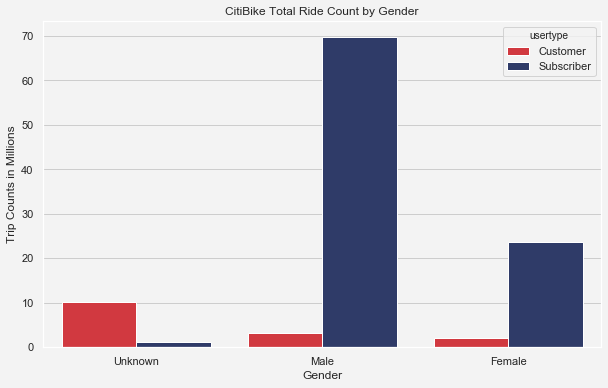

In [29]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#ea2029", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (10,6))
fig = sns.barplot(x = 'genders', y = 'counts_mil', hue = 'usertype', data = trip_counts)
fig.set_title('CitiBike Total Ride Count by Gender', fontsize=12)
fig.set_xlabel('Gender', fontsize=12)
fig.set_ylabel('Trip Counts in Millions', fontsize=12)

#### Number of Trips

In [3]:
rides['starttime'] = pd.to_datetime(rides['starttime'])
rides['date'] = rides['starttime'].dt.strftime('%Y-%m-%d')
rides['date'] = pd.to_datetime(rides['date'])
rides['month'] = rides['date'].dt.strftime('%Y-%m')
rides['year'] = rides['date'].dt.strftime('%Y')
rides['month3'] = rides['date'].dt.strftime('%Y-%m')

In [4]:
rides['month2'] = rides.starttime.dt.month.apply(lambda x: 'Jan' if x == 1 else 'Feb' if x == 2 else \
    'Mar' if x == 3 else 'Apr' if x == 4 else 'May' if x == 5 else 'Jun' if x == 6 else 'Jul' if x == 7 else \
    'Aug' if x == 8 else 'Sep' if x == 9 else 'Oct' if x == 10 else 'Nov' if x == 11 else 'Dec' )

In [25]:
rides['month3'] = rides['date'].dt.strftime('%m')

In [27]:
monthly = rides.groupby(['year','month3'])[['month3']].count().rename(columns={'month3':'counts'}).reset_index()

In [28]:
monthly['counts_mil'] = monthly['counts'] / 1000000

In [23]:
monthly

year    month   counts  counts_mil
0   2013  2013-06   559643    0.559643
1   2013  2013-07   843417    0.843417
2   2013  2013-08  1001958    1.001958
3   2013  2013-09  1034359    1.034359
4   2013  2013-10  1037712    1.037712
..   ...      ...      ...         ...
85  2020  2020-07  2105808    2.105808
86  2020  2020-08  2329514    2.329514
87  2020  2020-09  2488225    2.488225
88  2020  2020-10  2248869    2.248869
89  2020  2020-11  1736704    1.736704

[90 rows x 4 columns]

Text(0, 0.5, 'Number of Bike Rides (Million)')

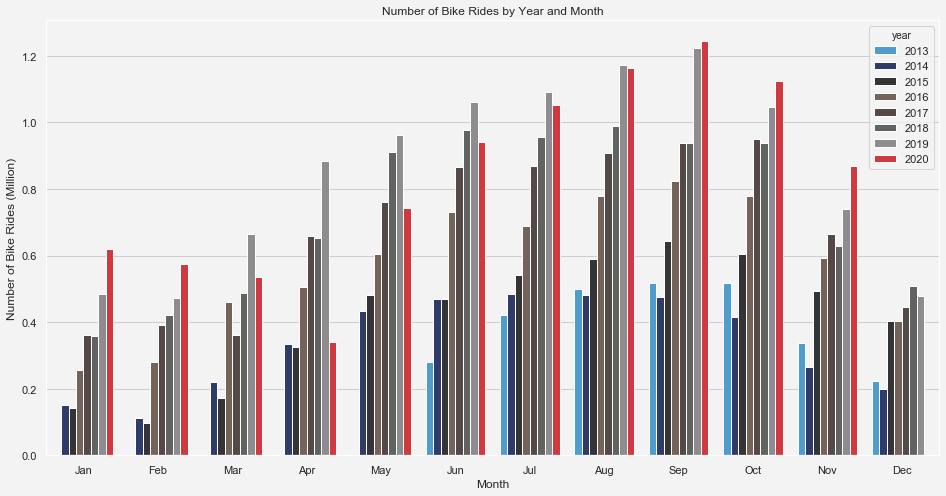

In [17]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#574746","#60645f","#8e8c8e","#ea2029","#ea2029","#263571","#263571","#263571"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (16,8))
fig = sns.barplot(x = 'month2', y = 'counts_mil', hue = 'year', data = monthly, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',\
                                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],\
                 ci = False)
fig.set_title('Number of Bike Rides by Year and Month', fontsize=12)
fig.set_xlabel('Month', fontsize=12)
fig.set_ylabel('Number of Bike Rides (Million)', fontsize=12)

Text(0, 0.5, 'Number of Bike Rides (Million)')

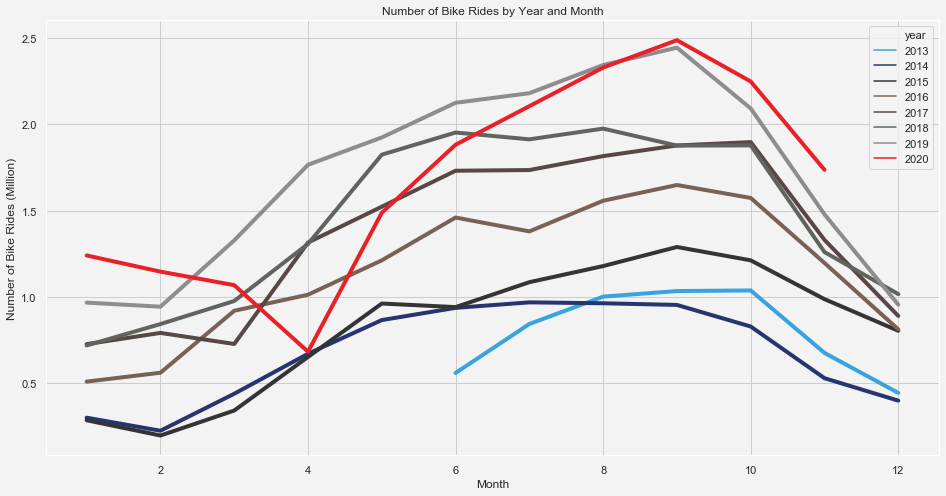

In [47]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#574746","#60645f","#8e8c8e","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (16,8))
fig = sns.lineplot(x = 'month3', y = 'counts_mil', hue = 'year', data = monthly, palette = colors,
                  hue_order = (['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']),
                  linewidth = 4)
fig.set_title('Number of Bike Rides by Year and Month', fontsize=12)
fig.set_xlabel('Month', fontsize=12)
fig.set_ylabel('Number of Bike Rides (Million)', fontsize=12)

In [41]:
monthly = monthly.sort_values('month3')
monthly['month3'] = monthly['month3'].astype(int)
monthly

year  month3   counts  counts_mil
55  2018       1   718994    0.718994
19  2015       1   285552    0.285552
31  2016       1   509478    0.509478
67  2019       1   967269    0.967269
7   2014       1   300400    0.300400
..   ...     ...      ...         ...
54  2017      12   889967    0.889967
6   2013      12   443966    0.443966
66  2018      12  1016416    1.016416
42  2016      12   812192    0.812192
30  2015      12   804125    0.804125

[90 rows x 4 columns]

In [19]:
monthly2 = monthly.groupby(['month2', 'usertype'])[['counts_mil']].mean().rename(columns={'counts_mil':'average'}).reset_index()

In [20]:
monthly2

month2    usertype   average
0     Apr    Customer  0.141942
1     Apr  Subscriber  0.916361
2     Aug    Customer  0.299217
3     Aug  Subscriber  1.346794
4     Dec    Customer  0.044198
5     Dec  Subscriber  0.715167
6     Feb    Customer  0.036190
7     Feb  Subscriber  0.635279
8     Jan    Customer  0.031071
9     Jan  Subscriber  0.646896
10    Jul    Customer  0.271956
11    Jul  Subscriber  1.254805
12    Jun    Customer  0.257451
13    Jun  Subscriber  1.191349
14    Mar    Customer  0.067975
15    Mar  Subscriber  0.760092
16    May    Customer  0.233980
17    May  Subscriber  1.166136
18    Nov    Customer  0.121263
19    Nov  Subscriber  1.026606
20    Oct    Customer  0.213274
21    Oct  Subscriber  1.380737
22    Sep    Customer  0.284582
23    Sep  Subscriber  1.417317

Text(0, 0.5, 'Average Number of Bike Rides (Million)')

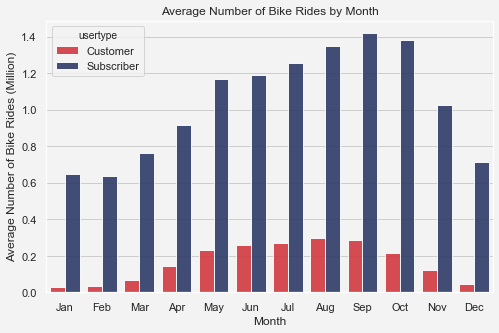

In [24]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#ea2029","#263571","#263571","#263571","#263571","#263571","#263571","#263571","#ea2029","#263571","#263571","#263571"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (8,5))
fig = sns.barplot(x = 'month2', y = 'average', hue = 'usertype', data = monthly2, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',\
                                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                 alpha = 0.9, palette = None)
fig.set_title('Average Number of Bike Rides by Month', fontsize=12)
fig.set_xlabel('Month', fontsize=12)
fig.set_ylabel('Average Number of Bike Rides (Million)', fontsize=12)

#### Distribution of Duration

In [25]:
duration_mins = rides.loc[(rides.tripduration / 60 < 60)][['tripduration']]
duration_mins = duration_mins / 60

In [26]:
duration_mins

tripduration
0              6.033333
1              3.133333
2              5.083333
3              3.716667
4             12.633333
...                 ...
110341608     26.450000
110341609      3.700000
110341610      2.716667
110341611      5.450000
110341612      8.066667

[108984248 rows x 1 columns]

Text(0, 0.5, 'Trip counts')

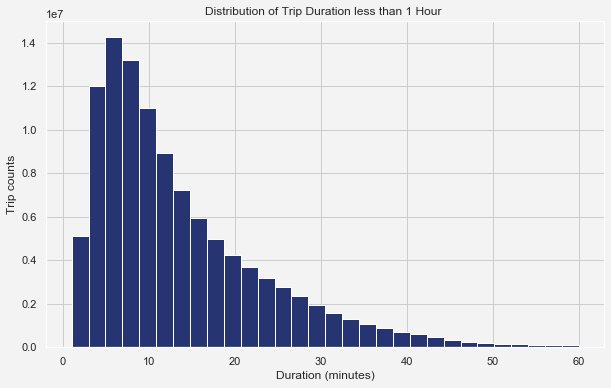

In [28]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571"]
sns.set_palette(sns.color_palette(colors))
duration_mins.hist(figsize = (10,6), bins = 30)
plt.tick_params(axis = 'both', which = 'major')
plt.title('Distribution of Trip Duration less than 1 Hour ')
plt.xlabel('Duration (minutes)')
plt.ylabel('Trip counts')

#### Weekdays vs Weekends

In [30]:
# Calculate trip counts per hour on weekdays and weekends
rides_sub = rides.loc[:, ['tripduration', 'starttime']]
rides_sub.index = rides_sub['starttime']
weekdays = rides_sub[rides_sub.index.weekday < 5]
weekends = rides_sub[rides_sub.index.weekday > 4]
weekday_ridesPerHr = weekdays.groupby(weekdays.index.hour).size()
weekend_ridesPerHr = weekends.groupby(weekends.index.hour).size()

In [31]:
rides['weekdays'] = rides.starttime.dt.weekday.apply(lambda x: 'Weekdays' if x <= 5 else 'Weekend')

In [32]:
weekdays_df = rides[['tripduration', 'weekdays', 'starttime']]

In [33]:
weekdays_df['start_hour'] = weekdays_df.starttime.dt.hour

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
weekdays_df

tripduration  weekdays               starttime  start_hour
0                   362  Weekdays 2017-09-01 00:00:17.000           0
1                   188  Weekdays 2017-09-01 00:00:21.000           0
2                   305  Weekdays 2017-09-01 00:00:25.000           0
3                   223  Weekdays 2017-09-01 00:00:52.000           0
4                   758  Weekdays 2017-09-01 00:01:01.000           0
...                 ...       ...                     ...         ...
110341608          1587  Weekdays 2020-01-31 23:59:26.882          23
110341609           222  Weekdays 2020-01-31 23:59:32.641          23
110341610           163  Weekdays 2020-01-31 23:59:39.178          23
110341611           327  Weekdays 2020-01-31 23:59:49.231          23
110341612           484  Weekdays 2020-01-31 23:59:57.036          23

[110341613 rows x 4 columns]

In [35]:
weekdays_DF = weekdays_df.groupby(['start_hour', 'weekdays'])[['start_hour']].count().rename(columns={'start_hour':'counts'}).reset_index()

In [36]:
weekdays_DF['start_hour'] = weekdays_DF['start_hour'].astype(str)

In [37]:
weekdays_DF['counts_mil'] = weekdays_DF['counts'] / 1000000

In [38]:
weekdays_rides = weekdays_df[weekdays_df['weekdays'] == 'Weekdays']
weekend_rides = weekdays_df[weekdays_df['weekdays'] == "Weekend"]

Text(0, 0.5, 'Number of Bike Rides (Million)')

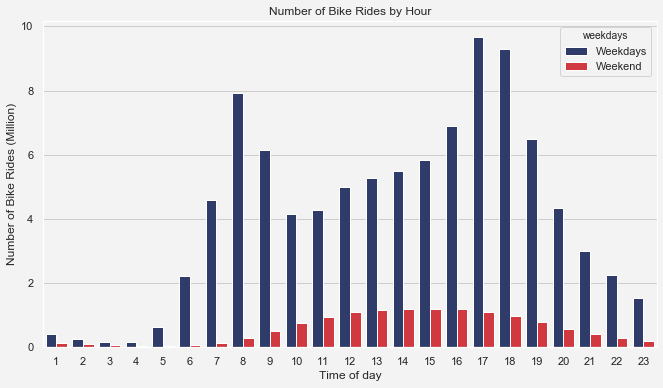

In [41]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#263571", '#ea2029', '#39a2e1']
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (11,6))
fig = sns.barplot(x = 'start_hour', y = 'counts_mil', hue = 'weekdays',
                  order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14',\
                  '15','16','17','18','19','20','21','22','23'],data = weekdays_DF)
fig.set_title('Number of Bike Rides by Hour', fontsize=12)
fig.set_xlabel('Time of day', fontsize=12)
fig.set_ylabel('Number of Bike Rides (Million)', fontsize=12)

#### Basic summary data

In [39]:
rides.head(10)

tripduration           starttime    usertype birth year  gender season  \
0           362 2017-09-01 00:00:17  Subscriber       1993       1   fall   
1           188 2017-09-01 00:00:21  Subscriber       1988       1   fall   
2           305 2017-09-01 00:00:25  Subscriber       1969       1   fall   
3           223 2017-09-01 00:00:52  Subscriber       1993       1   fall   
4           758 2017-09-01 00:01:01  Subscriber       1987       1   fall   
5          2089 2017-09-01 00:01:20  Subscriber       1975       2   fall   
6           121 2017-09-01 00:01:22  Subscriber       1990       1   fall   
7           408 2017-09-01 00:01:39  Subscriber       1961       1   fall   
8           485 2017-09-01 00:01:41  Subscriber       1984       1   fall   
9           220 2017-09-01 00:01:40  Subscriber       1992       1   fall   

  dayofweek       date    month  year month2  
0    Friday 2017-09-01  2017-09  2017    Sep  
1    Friday 2017-09-01  2017-09  2017    Sep  
2    Friday 2017-09-01  2017-09  2017    Sep  
3    Friday 2017-09-01  2017-09  2017    Sep  
4    Friday 2017-09-01  2017-09  2017    Sep  
5    Friday 2017-09-01  2017-09  2017    Sep  
6    Friday 2017-09-01  2017-09  2017    Sep  
7    Friday 2017-09-01  2017-09  2017    Sep  
8    Friday 2017-09-01  2017-09  2017    Sep  
9    Friday 2017-09-01  2017-09  2017    Sep

In [40]:
rides['day'] = rides['date'].dt.strftime('%d')

In [41]:
daily = rides.groupby(['day'])[['tripduration']].mean().rename(columns={'tripduration':'average'}).reset_index()

In [43]:
rides.describe()

tripduration        gender
count  1.103416e+08  1.103416e+08
mean   1.025989e+03  1.129741e+00
std    1.307206e+04  5.659197e-01
min    6.000000e+01  0.000000e+00
25%    3.810000e+02  1.000000e+00
50%    6.440000e+02  1.000000e+00
75%    1.121000e+03  1.000000e+00
max    1.951005e+07  2.000000e+00

In [45]:
1.025989e+03 / 60

17.099816666666666

In [55]:
1.951005e+07 /60

325167.5

In [46]:
dailyrides = rides.groupby(['date'])[['date']].count().rename(columns={'date':'count'}).reset_index()

In [49]:
dailyrides.describe()

count
count    2732.000000
mean    40388.584553
std     21321.406302
min       876.000000
25%     24560.500000
50%     36775.000000
75%     56220.500000
max    101462.000000

In [51]:
rides.groupby(['usertype'])[['usertype']].count().rename(columns={'usertype':'count'}).reset_index()

usertype     count
0    Customer  15469438
1  Subscriber  94820395

In [52]:
15469438 + 94820395

110289833

In [53]:
94820395 / 110289833 * 100

85.97383133221355

In [56]:
age = rides.groupby(['birth year'])[['birth year']].count().rename(columns={'birth year': 'count'}).reset_index()

In [57]:
age

birth year    count
0         1857        6
1         1858        1
2         1863        2
3         1873       43
4         1874       11
..         ...      ...
295       2001     1192
296       2002      594
297       2003      172
298       2004       54
299         \N  1247644

[300 rows x 2 columns]

In [66]:
83900 * 30

2517000

In [42]:
rides['day_of_week'] = rides['starttime'].dt.day_name()
rides['datehour'] = rides['starttime'].dt.hour

In [43]:
weekday_hourly = rides.groupby(['day_of_week','datehour']).size().reset_index(name='total_rides')


/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:1656: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


<Figure size 1008x504 with 0 Axes>

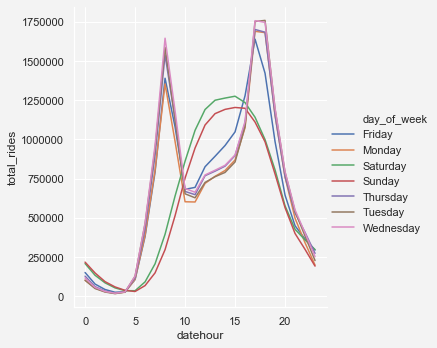

In [86]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
colors = ["#39a2e1","#263571","#ea2029","#ea2029","#574746","#60645f","#8e8c8e","#ea2029"]
plt.figure(figsize = (14,7))
sns.relplot(ax = ax, x="datehour", y="total_rides", data = weekday_hourly, hue="day_of_week", kind="line")

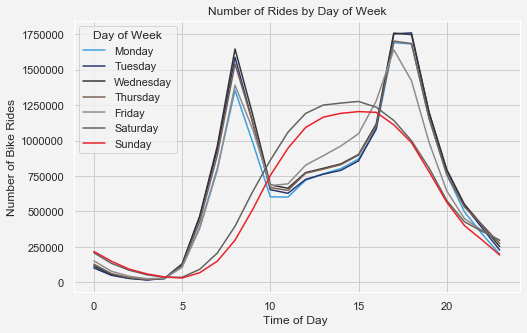

In [47]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#8e8c8e","#60645f","#ea2029"]
plt.subplots(figsize = (8,5))
sns.set_palette(sns.color_palette(colors))
fig = sns.lineplot(x="datehour", y="total_rides", data = weekday_hourly, hue="day_of_week",
            hue_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], legend = False)
fig.set_title('Number of Rides by Day of Week', fontsize=12)
fig.set_xlabel('Time of Day ', fontsize=12)
fig.set_ylabel('Number of Bike Rides', fontsize=12)
plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
           title = 'Day of Week')

In [3]:
rides_start = pd.read_csv('../data/riders_cleaned.csv.gz', 
                       usecols = ['start station id', 'start station name', 'start station latitude', \
                                  'start station longitude', 'tripduration']).reset_index()

In [4]:
rides_end = pd.read_csv('../data/riders_cleaned.csv.gz', 
                       usecols = ['end station id', 'end station name', 'end station latitude', \
                                  'end station longitude', 'tripduration'])

In [5]:
rides_start_df = rides_start.copy()

In [6]:
rides_start_df.index = rides_start['start station id']
rides_start_df['trip_count'] = rides_start.groupby('start station id')['start station id'].count()
rides_start_df['mean_duration'] = rides_start.groupby('start station id')['tripduration'].mean()
rides_start_df = rides_start_df.drop_duplicates()
rides_start_df.head()

index  tripduration  start station id  \
start station id                                          
3331                  0           362              3331   
3101                  1           188              3101   
3140                  2           305              3140   
236                   3           223               236   
3427                  4           758              3427   

                        start station name  start station latitude  \
start station id                                                     
3331               Riverside Dr & W 104 St               40.801343   
3101                 N 12 St & Bedford Ave               40.720798   
3140                       1 Ave & E 78 St               40.771404   
236                    St Marks Pl & 2 Ave               40.728419   
3427              Lafayette St & Jersey St               40.724305   

                  start station longitude  trip_count  mean_duration  
start station id                                                      
3331                           -73.971146       72550    1554.021406  
3101                           -73.954847       84803    1066.021603  
3140                           -73.953517      226841     965.674389  
236                            -73.987140      364489     844.568920  
3427                           -73.996010      184680     859.607207

In [ ]:
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

norm = Normalize(rides_start_df['trip_count'].min(), rides_start_df['trip_count'].max())
# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png'

start_station_map = folium.Map(location = [40.74, -73.97], width = 600, height = 600,
                               tiles = tileset,
                               attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                               zoom_start = 12)

for index, row in rides_start_df.iterrows():
    color = rgb2hex(cm.YlOrRd(norm(row['trip_count'])))
    folium.CircleMarker(location = [row['start station latitude'],
                                                row['start station longitude']],
                                    popup = row['start station id'],
                                    radius = row['mean_duration'] / 1000,
                                    fill_color = '#263571', line_color = '#263571').add_to(start_station_map)
    
start_station_map.save(outfile = 'start_station_map.html')

del start_station_map

In [14]:
rides_end

tripduration  end station id            end station name  \
0                   362            3328    W 100 St & Manhattan Ave   
1                   188            3100      Nassau Ave & Newell St   
2                   305            3141             1 Ave & E 68 St   
3                   223             473  Rivington St & Chrystie St   
4                   758            3431             E 35 St & 3 Ave   
...                 ...             ...                         ...   
110341608          1587            3092           Berry St & N 8 St   
110341609           222             383  Greenwich Ave & Charles St   
110341610           163             411           E 6 St & Avenue D   
110341611           327            3718          E 11 St & Avenue B   
110341612           484             534     Water - Whitehall Plaza   

           end station latitude  end station longitude  
0                     40.795000             -73.964500  
1                     40.724813             -73.947526  
2                     40.765005             -73.958185  
3                     40.721101             -73.991925  
4                     40.746524             -73.977885  
...                         ...                    ...  
110341608             40.719009             -73.958525  
110341609             40.735238             -74.000271  
110341610             40.722281             -73.976687  
110341611             40.727464             -73.979504  
110341612             40.702551             -74.012723  

[110341613 rows x 5 columns]

In [18]:
rides_end.index = rides_end['end station id']
rides_end = rides_end.drop_duplicates()
rides_end['trip_count'] = rides_end.groupby('end station id')['end station id'].count()
rides_end['mean_duration'] = rides_end.groupby('end station id')['tripduration'].mean()
rides_end.head()

ValueError: 'end station id' is both an index level and a column label, which is ambiguous.

In [ ]:
tileset = r'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'
end_station_map = folium.Map(location = [40.74, -73.97], width = 600, height = 600,
                               tiles = tileset,
                               attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                               zoom_start = 12)

for index, row in end_station.iterrows():
    color = rgb2hex(cm.YlOrRd(norm(row['trip_count'])))
    folium.CircleMarker(location = [row['end station latitude'],
                                                row['end station longitude']],
                                    popup = row['end station name'],
                                    radius = row['trip_count'] / 10000,
                                    fill_color = '#00FFFF', line_color = '#00FFFF').add_to(end_station_map)
    
end_station_map.save(outfile = 'end_station_map.html')

del end_station_map

IFrame('end_station_map.html', width = 600, height = 600)